<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li></ul></div>

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns

In [43]:
df = pd.read_csv('bank_scrooge.csv')

In [44]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [46]:
# посмотрим min, max, среднее и тд.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USERID,10000.0,171814.712600,3.370824e+04,94561.0,142810.25,172728.000,201261.7500,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,802.00,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.00,40.000,51.0000,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.00,3.000,4.0000,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.200,980705.8500,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.00,2.000,2.0000,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.00,1.000,1.0000,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.00,1.000,1.0000,1.000000e+00
EST_SALARY,10000.0,147866.885544,1.393885e+05,2546.3,75251.90,119658.105,174500.5425,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.00,0.000,0.0000,1.000000e+00


Переименуем столбцы

In [47]:
df.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'}, inplace = True)

Проверим пропущенные значения

In [48]:
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Чтобы преобразовать значения столбца age к типу int, заменим пропущенные значения на 0. В дальнейшем будем учитывать, что минимальный возраст клиента - 18 лет.

In [49]:
df['age'] = df['age'].fillna(0)
df.isna().sum()# проверим результат

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Проверим, есть ли зависимость между пропусками в столбце balance с другими характеристиками. Чтобы построить матрицу корелляции, заменим пропуски на 0

In [70]:
null_balance['balance'] = null_balance['balance'].fillna(0)


In [71]:
print(null_balance.corr())

                user_id     score       age    equity  balance  products  \
user_id        1.000000  0.035911 -0.028199  0.022192      NaN  0.025541   
score          0.035911  1.000000 -0.036196  0.013716      NaN -0.030686   
age           -0.028199 -0.036196  1.000000  0.015473      NaN  0.021263   
equity         0.022192  0.013716  0.015473  1.000000      NaN -0.019009   
balance             NaN       NaN       NaN       NaN      NaN       NaN   
products       0.025541 -0.030686  0.021263 -0.019009      NaN  1.000000   
credit_card   -0.019757 -0.198929 -0.160997  0.007787      NaN -0.040308   
last_activity -0.009959 -0.028819 -0.007503 -0.008866      NaN -0.040034   
est_salary    -0.021837 -0.052084  0.013452 -0.017160      NaN  0.037020   
churn         -0.037204 -0.018767  0.036330  0.060091      NaN  0.056160   

               credit_card  last_activity  est_salary     churn  
user_id          -0.019757      -0.009959   -0.021837 -0.037204  
score            -0.198929     

Наличие пропущенных значений в столбце balance не имеет прямой связи ни с наличием кредитной карты, ни с количеством продуктов, которыми пользуется клиент, ни с приблизительной оценкой собственности клиента. Вероятно, наличие пропусков связано с тем, что данные клиенты не имеют депозитных, накопительных счетов или вкладов и пользуются другими продуктами и услугами банка: кредитные карты, страхование, банковские ячейки и др.

In [52]:
# проверим наличие явных дубликатов
print('Количество дубликатов в таблице:', df.duplicated().sum())

Количество дубликатов в таблице: 0


In [53]:
# проверим датафрейм на наличие неявных дубликатов
df.loc[df.duplicated(subset=['user_id'], keep=False)].sort_values('user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0


Здесь мы видим, что клиенты с одинаковыми id встречаются в разных городах. Вероятно, присвоение идентификатора пользователя в разных филиалах банка происходит независимо. Оставляем.

Изменим тип данных в столбцах score и age на int

In [54]:
df['score'] = df['score'].astype(int)
df['age'] = df['age'].astype(int)

Проверим на уникальность значения столбцов city и gender

In [55]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [56]:
df['gender'].unique()

array(['Ж', 'М'], dtype=object)

Добавим столбцы с наименованиями городов и по гендерному признаку

In [57]:
df['city_dummies'] = df['city']
df['gender_dummies'] = df['gender']
df = pd.get_dummies(df, columns=['city_dummies', 'gender_dummies'], prefix='', prefix_sep='', dtype=int)


In [58]:
df.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,0,1,0,0,1
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0,0,0,1,1,0
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0,0,0,1,1,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,0,0,1,0,1
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0,0,0,1,1,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  int32  
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int32  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
 12  Ростов         10000 non-null  int32  
 13  Рыбинск        10000 non-null  int32  
 14  Ярославль      10000 non-null  int32  
 15  Ж              10000 non-null  int32  
 16  М              10000 non-null  int32  
dtypes: float64(2), int32(7), int64(6), object(2)
memory

Вывод: перед нами данные о 10000 клиентах из 3 городов, мужчины и женщины в возрасте от 18 до 86 лет, с баллами
собственности от 642 до 1000, которые пользуются до 5 продуктами банка. Проведена проверка на наличие дубликатов, пропущенных значений.
В датафрейме встречаются строки с одинаковыми значениями id клиента. Так как эти пользователи из разных городов, передположим, что присвоение идентификатора пользователя в разных филиалах банка происходит независимо. Оставляем. Заменим пропущенные значения в столбце age на 0. В дальнейшем будем учитывать, что минимальный возраст клиента - 18 лет.
Наличие пропущенных значений в столбце balance не имеет прямой связи ни с наличием кредитной карты, ни с количеством продуктов, которыми пользуется клиент, ни с приблизительной оценкой собственности клиента. Вероятно, наличие пропусков связано с тем, что данные клиенты не имеют депозитных, накопительных счетов или вкладов и пользуются другими продуктами и услугами банка: кредитные карты, страхование, банковские ячейки и др.

## Исследовательский анализ

Посмотрим количество клиентов в каждом городе 

In [124]:
df_city=df.groupby(['city','churn'])['user_id'].count()
df_city=df_city.reset_index()
df_city.columns=['city','churn','count']
df_city=df_city.sort_values('count',ascending=False)
df_city

,city,churn,count
4,Ярославль,0,4771
2,Рыбинск,0,2258
0,Ростов,0,1151
5,Ярославль,1,1117
3,Рыбинск,1,437
1,Ростов,1,266


In [103]:
fig = px.bar(df_city, x='city', y='count', color='churn', title='Количество клиентов по городам')
fig.update_layout(
    xaxis_title="город",
    yaxis_title="число клиентов")

fig.show() 

Большинство клиентов банка обслуживаются в Ярославле

In [105]:
df_gender=df.groupby(['city','gender'])['user_id'].count()
df_gender=df_gender.reset_index()
df_gender.columns=['city','gender','count']
df_gender=df_gender.sort_values('count',ascending=False)

In [107]:
fig = px.bar(df_gender, x='city', y='count', color='gender', title='Количество мужчин и женщин по городам')
fig.update_layout(
    xaxis_title="город",
    yaxis_title="число клиентов")

fig.show()

Количество мужчин и женщин приблизительно одинаково

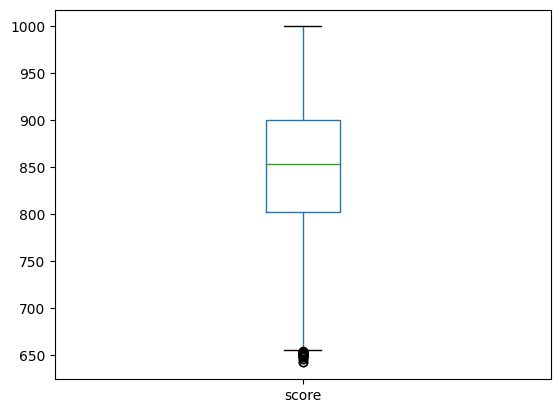

In [109]:
ax = df['score'].plot.box()
plt.show()

По диаграмме размаха видно наличие выбросов, межквартильный размах - от 800 до 900. Посчитаем медиану.

In [111]:
print('Медианное значение баллов кредитного скоринга', df['score'].median())

Медианное значение баллов кредитного скоинга 853.0


In [115]:
print('Средний возраст клиентов', round(df['age'].median()))

Средний возраст клиентов 40


Посмотрим количество баллов собственности у клиентов

In [121]:
df_equity=df['equity'].value_counts()
df_equity=df_equity.reset_index()
df_equity.columns=['equity','count']


In [123]:
fig = px.bar(df_equity, x='equity', y='count', pattern_shape="equity", title='количество баллов собственности у клиентов')
fig.update_layout(
    xaxis_title="баллы",
    yaxis_title="число клиентов")

fig.show()

Большинство клиентов имеют приблизительную оценку собственности 0.

Рассчитаем доли мужчин и женщин среди клиентов банка

In [60]:
df['М'].mean()

0.5005

In [61]:
df['Ж'].mean()

0.4995

Рассчитаем доли мужчин и женщин среди лояльных и отточных клиентов

In [62]:
print('Доля мужчин среди лояльных клиентов:', round(100*df[df['churn']==0]['М'].mean(),2), '%')
print('Доля мужчин среди отточных клиентов:', round(100*df[df['churn']==1]['М'].mean(),2), '%')

Доля мужчин среди лояльных клиентов: 46.72 %
Доля мужчин среди отточных клиентов: 65.0 %


In [63]:
print('Доля женщин среди лояльных клиентов:', round(100*df[df['churn']==0]['Ж'].mean(),2), '%')
print('Доля женщин среди отточных клиентов:', round(100*df[df['churn']==1]['Ж'].mean(),2), '%')

Доля женщин среди лояльных клиентов: 53.28 %
Доля женщин среди отточных клиентов: 35.0 %


В целом в датафрейме отношение числа женщин и мужчин почти одинаково. Среди отточных клиентов больше мужчин, чем женщин. 65% клиентов, планирующих уйти из банка, - это мужчиныю

рассчитаем средний возраст клиента банка

In [64]:
df['age'].median()

40.0

рассчитаем средний возраст лояльного и отточного клиентов банка

In [65]:
print('Средний возраст лояльных клиентов:', round(df[df['churn']==0]['age'].median()))
print('Средний возраст отточных клиентов:', round(df[df['churn']==1]['age'].median()))

Средний возраст лояльных клиентов: 40
Средний возраст отточных клиентов: 39


Посмотрим, в каком городе отточных клиентов больше

In [66]:
print('Доля отточных клиентов в Ростове', round(100*df[df['churn']==1]['Ростов'].sum()/df['Ростов'].count(),2), '%')
print('Доля отточных клиентов в Рыбинске',round(100*df[df['churn']==1]['Рыбинск'].sum()/df['Рыбинск'].count(),2), '%')
print('Доля отточных клиентов в Ярославле',round(100*df[df['churn']==1]['Ярославль'].sum()/df['Ярославль'].count(),2), '%')

Доля отточных клиентов в Ростове 2.66 %
Доля отточных клиентов в Рыбинске 4.37 %
Доля отточных клиентов в Ярославле 11.17 %


Очень большой процент оттока можно отметить в Ярославле -11.17% от общего числа клиентов этого города, самый низкий процент оттока 2,66% - в Ростове